# Network Analysis- Assessment 1

First searched a random network. went through network repository but didnt get descriptions. stanford- got discription. picked a road connections in california dataset. got bored and started with game of thrones analysis example and finally worked on new hogwards dataset
1. https://ericmjl.github.io/Network-Analysis-Made-Simple/05-casestudies/01-gameofthrones/
2. https://github.com/efekarakus/potter-network/tree/master/data

Properties of network:
1. Undirected
2. Weighted
3. Small
4. Fictional

In [1]:
#!pip install spacy
!pip install --upgrade scipy networkx
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np

In [2]:
# friend = '+', enemy = '-'

relations = pd.read_csv('relations.txt')
print(relations)

characters = pd.read_csv('characters.txt')
characters

     source  target type
0         0       1    -
1         0      25    -
2         0      45    -
3         1       0    -
4         1      11    +
..      ...     ...  ...
508      63      58    -
509      64      21    +
510      64      22    +
511      64      39    +
512      63      58    +

[513 rows x 3 columns]


,id,name,bio
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...
1,1,Sirius Black,Best friend of James Potter and godfather of H...
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...
...,...,...,...
60,60,Fluffy,Three-headed dog belonging to Rubeus Hagrid.
61,61,Hedwig,Harry's owl.
62,62,Moaning Myrtle,Ghost at Hogwards.
63,63,Aragog,Acromantula belonging to Rubeus Hagrid.


In [3]:
characters[characters['name']=='Fluffy']['bio'].item()

s = characters.set_index('id')['name']
relations['source'] = relations['source'].map(s)
relations['target'] = relations['target'].map(s)
relations

,source,target,type
0,Regulus Arcturus Black,Sirius Black,-
1,Regulus Arcturus Black,Bellatrix Lestrange,-
2,Regulus Arcturus Black,Lord Voldemort,-
3,Sirius Black,Regulus Arcturus Black,-
4,Sirius Black,Albus Dumbledore,+
...,...,...,...
508,Aragog,Ron Weasley,-
509,Grawp,Hermione Granger,+
510,Grawp,Rubeus Hagrid,+
511,Grawp,Harry Potter,+


In [4]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(relations, edge_attr='type', create_using=Graphtype)

In [5]:
type(G.degree)

networkx.classes.reportviews.DegreeView

In [6]:
sorted(G.degree, key=lambda x: x[1], reverse=True)[0:10]
# HUB is harry potter - no surprises here

[('Harry Potter', 48),
 ('Ron Weasley', 37),
 ('Lord Voldemort', 36),
 ('Hermione Granger', 36),
 ('Albus Dumbledore', 32),
 ('Sirius Black', 23),
 ('Ginny Weasley', 18),
 ('Fred Weasley', 17),
 ('George Weasley', 17),
 ('Molly Weasley', 17)]

In [7]:
nodes = G.nodes()
no_of_nodes = G.number_of_nodes()
N = no_of_nodes
N

65

In [8]:
edges = G.edges()
no_of_edges = G.number_of_edges()
L = no_of_edges
L

333

In [9]:
Average_degree = (2*L)/N
Average_degree

10.246153846153845

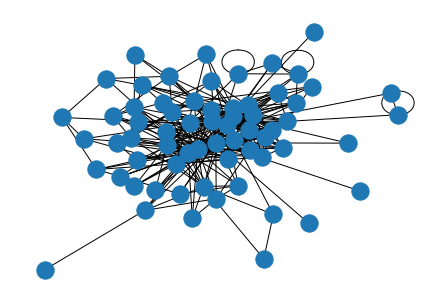

In [10]:
nx.draw(G)
# self connections- something wrong with data??

In [11]:
df_degree = pd.DataFrame(G.degree(), columns=["node", "degree"])
df_degree.head()

,node,degree
0,Regulus Arcturus Black,4
1,Sirius Black,23
2,Bellatrix Lestrange,13
3,Lord Voldemort,36
4,Albus Dumbledore,32


In [12]:
# no of edges = 1/2 of sum of degrees of each node
sum(df_degree['degree'])*0.5

333.0

Text(0.5, 1.0, 'Degree-Historgram')

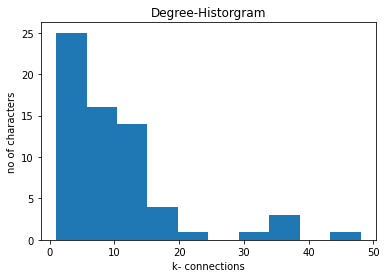

In [13]:
plt.hist(df_degree['degree'])
plt.xlabel("k- connections")
plt.ylabel("no of characters")
plt.title("Degree-Historgram")

In [14]:
degree_count = df_degree.groupby('degree')['degree'].count()
degree_dist = pd.DataFrame({'n':degree_count})
degree_dist['p'] = degree_dist['n']/degree_dist['n'].sum()
degree_dist['cdf'] = np.cumsum(degree_dist['p'])
degree_dist['ccdf'] = 1-degree_dist['cdf']
degree_dist

# there are 13 people out of 65 who have 4 links. By this we can say that most common no of links for each individual is 4.

,n,p,cdf,ccdf
degree,,,,
1,4,0.061538,0.061538,0.938462
2,3,0.046154,0.107692,0.892308
3,2,0.030769,0.138462,0.861538
4,13,0.200000,0.338462,0.661538
5,3,0.046154,0.384615,0.615385
6,3,0.046154,0.430769,0.569231
7,5,0.076923,0.507692,0.492308
8,4,0.061538,0.569231,0.430769
9,3,0.046154,0.615385,0.384615


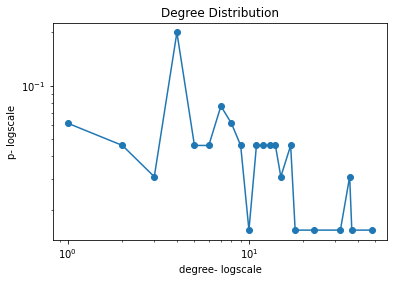

In [15]:
plt.plot(degree_dist.index, degree_dist['p'])
plt.scatter(degree_dist.index, degree_dist['p'])
plt.xlabel('degree- logscale')
plt.ylabel('p- logscale')
plt.yscale('log')
plt.xscale('log')
plt.title("Degree Distribution")
plt.show()

Exponential decay. Similar to power law distribution

In [16]:
#adjacency_matrix = nx.adjacency_matrix(G)


In [17]:
print(degree_dist['p'])

degree
1     0.061538
2     0.046154
3     0.030769
4     0.200000
5     0.046154
6     0.046154
7     0.076923
8     0.061538
9     0.046154
10    0.015385
11    0.046154
12    0.046154
13    0.046154
14    0.046154
15    0.030769
17    0.046154
18    0.015385
23    0.015385
32    0.015385
36    0.030769
37    0.015385
48    0.015385
Name: p, dtype: float64


In [18]:
print(degree_dist.sum())

n       65.000000
p        1.000000
cdf     14.230769
ccdf     7.769231
dtype: float64


In [19]:
# Total no of links in a complete graph. Every node is connected to every other node
Lmax = N*(N-1)/2
Lmax

2080.0

Since Lmax for this network is 2080 and L is 333, L< Lmax, this network is sparse matrix. Which also indicates that the adjacency matrix is also sparse

Network Pathology

In [20]:
nx.has_path(G, 'Lord Voldemort', 'Fred Weasley')

True

In [21]:
nx.shortest_path(G, 'Lord Voldemort', 'Fred Weasley')

['Lord Voldemort', 'Fred Weasley']

In [22]:
nx.shortest_path(G, 'Aragog', 'Frank Longbottom')


['Aragog', 'Hermione Granger', 'Lord Voldemort', 'Frank Longbottom']

In [23]:
nx.shortest_path_length(G, 'Aragog', 'Frank Longbottom')


3

In [24]:
# colour based on weights. red for enemy, green for friend

In [25]:
nx.diameter(G)

4

In [26]:
print(nx.average_shortest_path_length(G))

2.0283653846153844


In [27]:
print(nx.cycle_basis(G))

[['Sirius Black', 'Ron Weasley', 'Peter Pettigrew'], ['Albus Dumbledore', 'Ron Weasley', 'Peter Pettigrew'], ['Hermione Granger', 'Ron Weasley', 'Peter Pettigrew'], ['Fred Weasley', 'Ron Weasley', 'Peter Pettigrew'], ['George Weasley', 'Ron Weasley', 'Peter Pettigrew'], ['Ginny Weasley', 'Ron Weasley', 'Peter Pettigrew'], ['Argus Filch', 'Ron Weasley', 'Peter Pettigrew'], ['Remus Lupin', 'Ron Weasley', 'Peter Pettigrew'], ['Harry Potter', 'Ron Weasley', 'Peter Pettigrew'], ['Lord Voldemort', 'Ron Weasley', 'Peter Pettigrew'], ['Rubeus Hagrid', 'Grawp', 'Ron Weasley'], ['Hermione Granger', 'Grawp', 'Ron Weasley'], ['Harry Potter', 'Grawp', 'Ron Weasley'], ['Rubeus Hagrid', 'Aragog', 'Ron Weasley'], ['Hermione Granger', 'Aragog', 'Ron Weasley'], ['Harry Potter', 'Aragog', 'Ron Weasley'], ['Rubeus Hagrid', 'Fluffy', 'Ron Weasley'], ['Hermione Granger', 'Fluffy', 'Ron Weasley'], ['Harry Potter', 'Fluffy', 'Ron Weasley'], ['Alberforth Dumbledore', 'Dobby', 'Ron Weasley'], ['Bellatrix Lestra

In [28]:
nx.is_eulerian(G)
# there is no path which goes through all the nodes without crossing atleast one edge more than once

False

In line with the probabilistic interpretation 〈C〉- clustering coefficient is the probability that two neighbors of a randomly selected node link to each other.



In [29]:
print('Avg. clustering coefficient:', nx.average_clustering(G))

Avg. clustering coefficient: 0.6116923748817632


In [30]:
clus_coeff = nx.clustering(G)
df_clus_coeff = pd.DataFrame(clus_coeff.items(), columns= ['node','coeff'])
df2 = df_clus_coeff.query('coeff == coeff.max()')
print(df2)
df3 = df_clus_coeff.query('node == "Hedwig"')
print(df3)

                 node  coeff
22     Lavender Brown    1.0
44  Quirinus Quirrell    1.0
45       Rita Skeeter    1.0
53             Fluffy    1.0
54             Aragog    1.0
55              Grawp    1.0
58   Alice Longbottom    1.0
61     Tom Riddle Sr.    1.0
62        Mary Riddle    1.0
      node  coeff
63  Hedwig    0.0


The clustering coefficient is a basic measure for local density (connections) in a network. The number gives a 'probability' that two friends of a node are connected too (if A is connected to B and to C, how probable is the connections between B and C) .

In [31]:
relations_pos = relations[relations.type == '+']
print(relations_pos)

           source                   target type
4    Sirius Black         Albus Dumbledore    +
5    Sirius Black         Hermione Granger    +
7    Sirius Black              Remus Lupin    +
10   Sirius Black       Minerva McGonagall    +
11   Sirius Black  Alastor "Mad-Eye" Moody    +
..            ...                      ...  ...
506        Aragog            Rubeus Hagrid    +
509         Grawp         Hermione Granger    +
510         Grawp            Rubeus Hagrid    +
511         Grawp             Harry Potter    +
512        Aragog              Ron Weasley    +

[356 rows x 3 columns]


In [32]:
relations_neg = relations[relations.type == '-']
print(relations_neg)

                     source                  target type
0    Regulus Arcturus Black            Sirius Black    -
1    Regulus Arcturus Black     Bellatrix Lestrange    -
2    Regulus Arcturus Black          Lord Voldemort    -
3              Sirius Black  Regulus Arcturus Black    -
6              Sirius Black     Bellatrix Lestrange    -
..                      ...                     ...  ...
501                  Fluffy            Harry Potter    -
502                  Fluffy             Ron Weasley    -
505                  Aragog        Hermione Granger    -
507                  Aragog            Harry Potter    -
508                  Aragog             Ron Weasley    -

[157 rows x 3 columns]


In [34]:
G_pos = nx.from_pandas_edgelist(relations_pos, edge_attr='type', create_using=Graphtype)
print('Avg. clustering coefficient:', nx.average_clustering(G_pos))

Avg. clustering coefficient: 0.5236208756911296


In [37]:
G_pos.number_of_edges()

112

In [35]:
G_neg = nx.from_pandas_edgelist(relations_neg, edge_attr='type', create_using=Graphtype)
print('Avg. clustering coefficient:', nx.average_clustering(G_neg))

Avg. clustering coefficient: 0.059506139552275655


In [38]:
G_neg.number_of_edges()

112